<a href="https://colab.research.google.com/github/ABUALHUSSEIN/python_reg/blob/main/Group4__House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price Prediction

The goal : Training a model that can predict the price of a new house

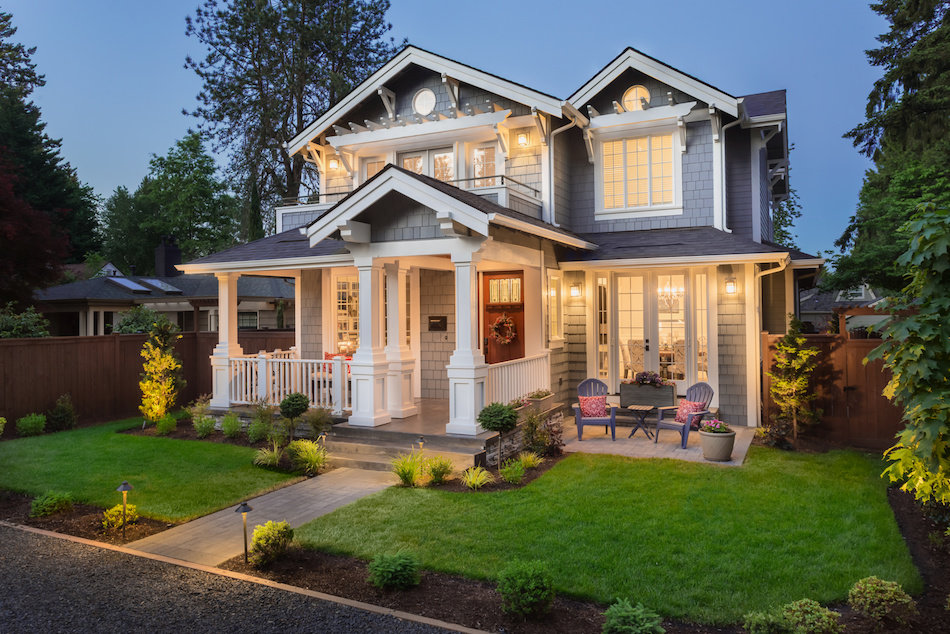

In [ ]:
from IPython import display
display.Image("https://www.justinhavre.com/uploads/agent-1/sell-home-in-slow-market.jpg")

##Phase 1 : Cleaning & understanding the data

Importing the packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#Importing data

In [ ]:

url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
housing= pd.read_csv(url)

In [ ]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
housing.tail(10).style.background_gradient(cmap='Blues')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.320000,39.290000,11.000000,2640.000000,505.000000,1257.000000,445.000000,3.567300,112000.000000,INLAND
20631,-121.400000,39.330000,15.000000,2655.000000,493.000000,1200.000000,432.000000,3.517900,107200.000000,INLAND
20632,-121.450000,39.260000,15.000000,2319.000000,416.000000,1047.000000,385.000000,3.125000,115600.000000,INLAND
20633,-121.530000,39.190000,27.000000,2080.000000,412.000000,1082.000000,382.000000,2.549500,98300.000000,INLAND
20634,-121.560000,39.270000,28.000000,2332.000000,395.000000,1041.000000,344.000000,3.712500,116800.000000,INLAND
20635,-121.090000,39.480000,25.000000,1665.000000,374.000000,845.000000,330.000000,1.560300,78100.000000,INLAND
20636,-121.210000,39.490000,18.000000,697.000000,150.000000,356.000000,114.000000,2.556800,77100.000000,INLAND
20637,-121.220000,39.430000,17.000000,2254.000000,485.000000,1007.000000,433.000000,1.700000,92300.000000,INLAND
20638,-121.320000,39.430000,18.000000,1860.000000,409.000000,741.000000,349.000000,1.867200,84700.000000,INLAND
20639,-121.240000,39.370000,16.000000,2785.000000,616.000000,1387.000000,530.000000,2.388600,89400.000000,INLAND


In [ ]:
# shape of data
housing.shape

(20640, 10)

10 features

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# examine the data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p>total observations: 20640</p>
<p>total columns (features): 10</p>
<p>data type of each feature: 9 numbers and 1 object. In this dataset, you can see the ocean_proximity feature is text (will handle later)</p>
total_bedrooms is 20433, which indicates null values - (will handle later).

In [ ]:
#nan value checking
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing.fillna(method="ffill", inplace=True)

In [ ]:
# na value checking after forward fill
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# Remove duplicates from the DataFrame
housing_cleaned = housing.drop_duplicates()

# Verify the number of duplicates removed
num_duplicates_removed = len(housing) - len(housing_cleaned)
print("Number of duplicates removed:", num_duplicates_removed)

Number of duplicates removed: 0


##phase2 : Data Exploration and Preliminary Analysis

In [ ]:
housing.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.000000,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20640.000000,537.642151,420.876678,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.000000,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.000000,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing["ocean_proximity"].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

Inspecting the distributions

<Figure size 1600x400 with 0 Axes>

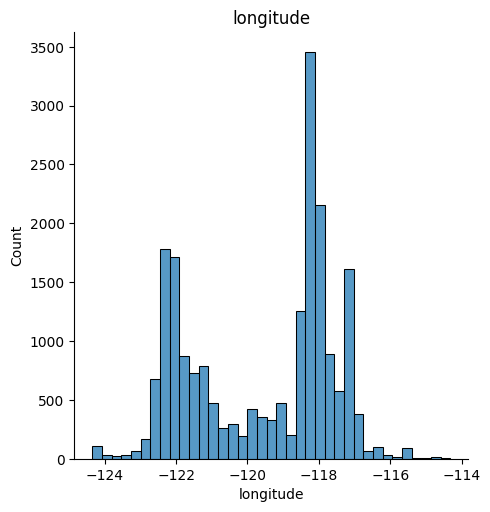

<Figure size 1600x400 with 0 Axes>

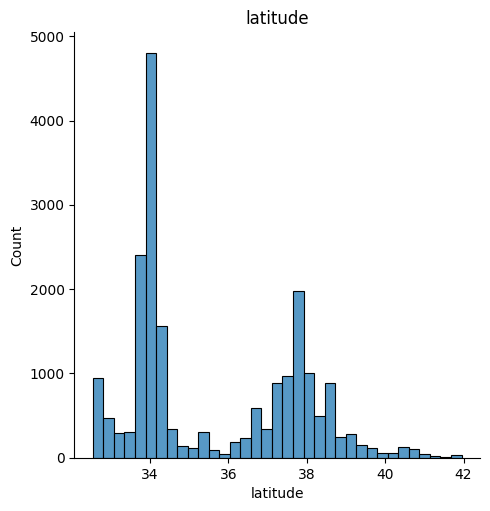

<Figure size 1600x400 with 0 Axes>

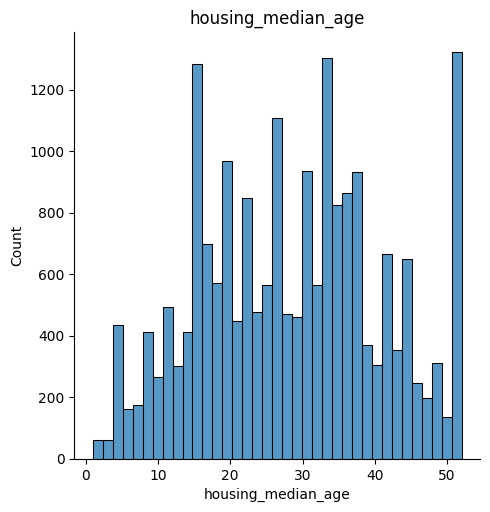

<Figure size 1600x400 with 0 Axes>

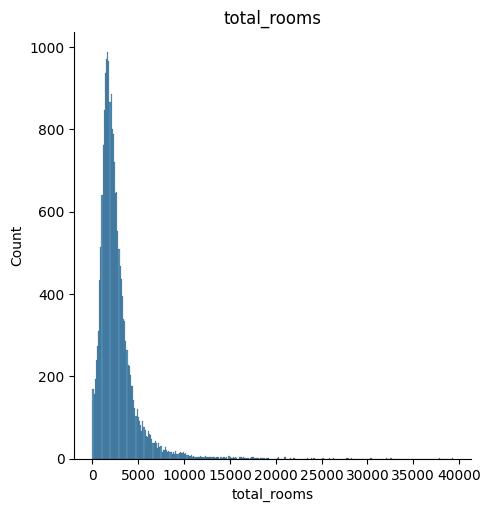

<Figure size 1600x400 with 0 Axes>

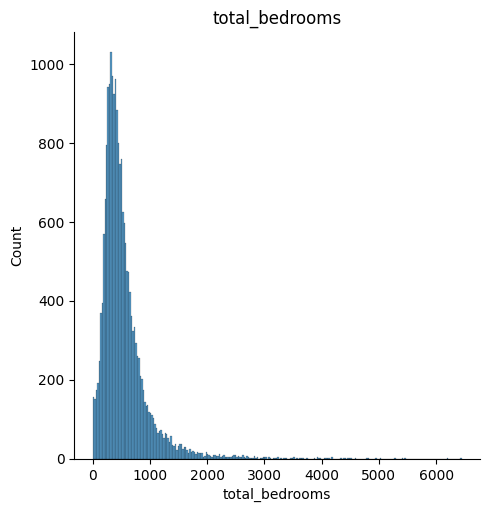

<Figure size 1600x400 with 0 Axes>

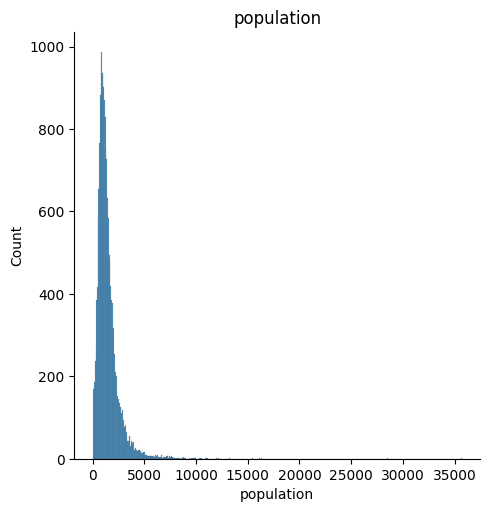

<Figure size 1600x400 with 0 Axes>

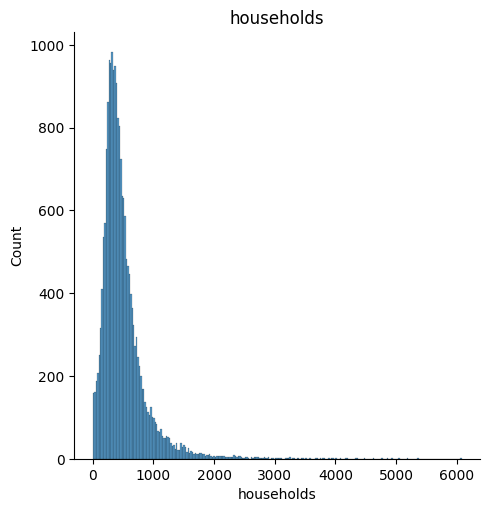

<Figure size 1600x400 with 0 Axes>

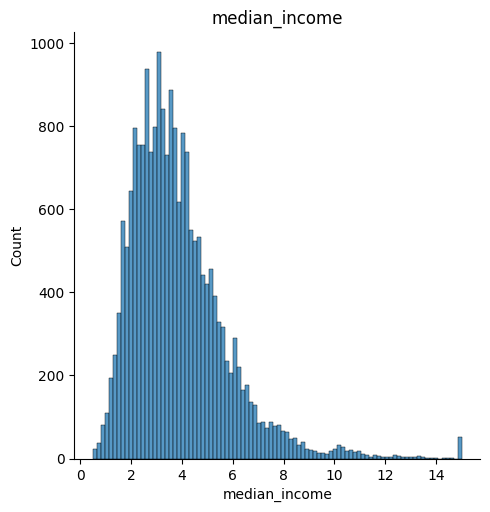

<Figure size 1600x400 with 0 Axes>

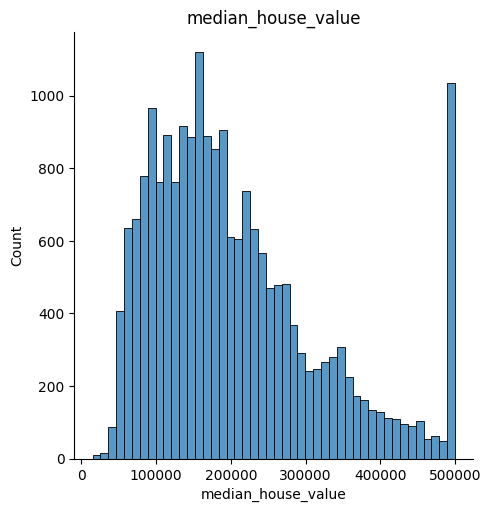

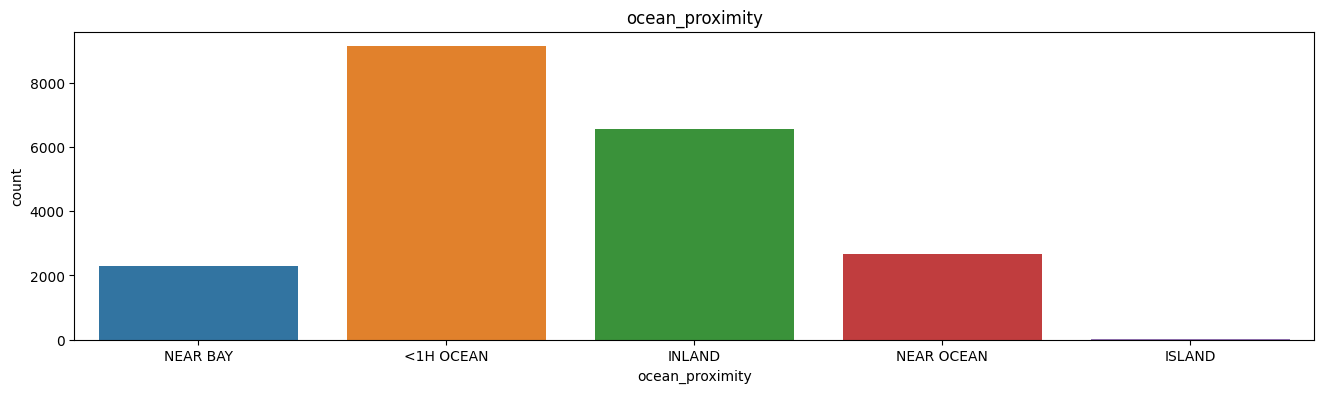

In [ ]:
# plot distributions of features, countplot if object, displot if numeric
for feat in housing.columns:
  plt.figure(figsize=(16,4))
  if housing[feat].dtype == 'object':
    sns.countplot(data=housing, x=feat) # for countplot must use data=
  else:
    sns.displot(housing, x=feat)
  plt.title(feat)
  plt.show()

<Axes: >

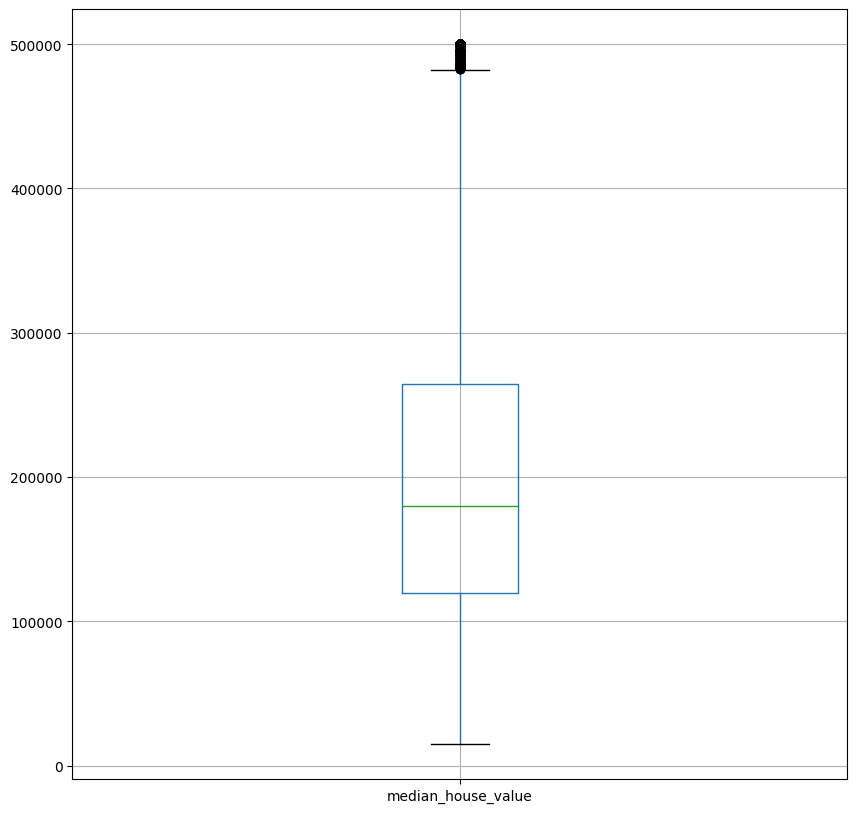

In [ ]:

housing.boxplot(['median_house_value'], figsize=(10, 10))


<ipython-input-258-536f92be5145>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing.median_house_value)


<Axes: xlabel='median_house_value', ylabel='Density'>

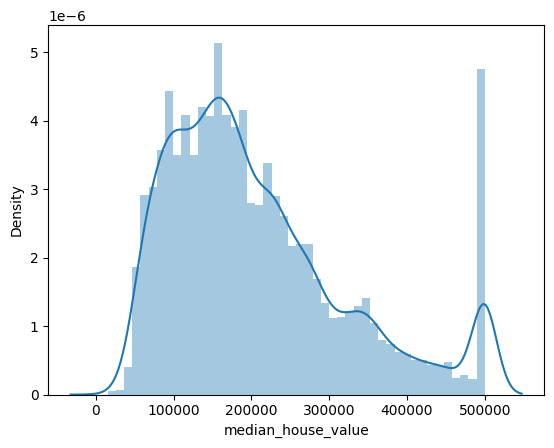

In [ ]:
sns.distplot(housing.median_house_value)

##We can see that the median house value is mostly falls between 10,0000 to 30,0000 with few exceptions.

In [ ]:
# observe the number of rows where the median_house_value is 0
(housing['median_house_value']==0).sum(0)

0

In [ ]:
len(housing.ocean_proximity.unique())

5

In [ ]:
new_val = pd.get_dummies(housing.ocean_proximity)

In [ ]:
new_val.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
housing[new_val.columns] = new_val

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.642151,1425.476744,499.539680,3.870671,0.442636,0.317393,0.000242,0.110950,0.128779,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.876678,1132.462122,382.329753,1.899822,0.496710,0.465473,0.015563,0.314077,0.334963,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,1.000000,0.000000,0.000000,0.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [ ]:
housing= housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0


In [ ]:
# Find correlataion matrix
housing_corr_matrix = housing.corr(numeric_only=True)
housing_corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.070442,0.099773,0.055310,-0.015176,0.321121,-0.055575,0.009446,-0.474489,0.045509,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.067535,-0.108785,-0.071035,-0.079809,-0.446969,0.351166,-0.016572,0.358771,-0.160818,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319312,-0.296244,-0.302916,-0.119034,0.045300,-0.236645,0.017020,0.255172,0.021622,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925347,0.857126,0.918484,0.198050,-0.003031,0.025624,-0.007572,-0.023022,-0.009175,0.134153
total_bedrooms,0.070442,-0.067535,-0.319312,0.925347,1.000000,0.872491,0.972942,-0.007473,0.018434,-0.006551,-0.004336,-0.020555,0.001243,0.049294
population,0.099773,-0.108785,-0.296244,0.857126,0.872491,1.000000,0.907222,0.004834,0.074613,-0.020732,-0.010412,-0.060880,-0.024264,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.972942,0.907222,1.000000,0.013033,0.042435,-0.039402,-0.009077,-0.010093,0.001714,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007473,0.004834,0.013033,1.000000,0.168876,-0.237496,-0.009228,0.056197,0.027344,0.688075
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018434,0.074613,0.042435,0.168876,1.000000,-0.607669,-0.013872,-0.314813,-0.342620,0.256617
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006551,-0.020732,-0.039402,-0.237496,-0.607669,1.000000,-0.010614,-0.240887,-0.262163,-0.484859


#Correlation Target and Continuous
median house value data  is our target variable

In [ ]:
# Correlation between median_house_value and other features
housing_corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049294
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

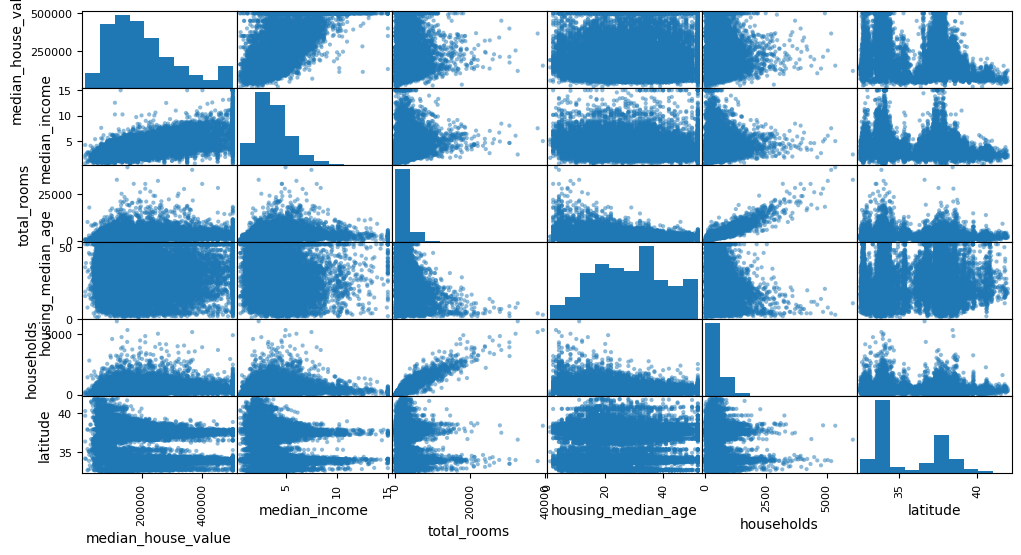

In [ ]:
features = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age", "households","latitude"]
# scatter plolt to demonstrate teh correaltion between some of the features
pd.plotting.scatter_matrix(housing[features], figsize=(12, 6))
plt.show()

#HeatMap

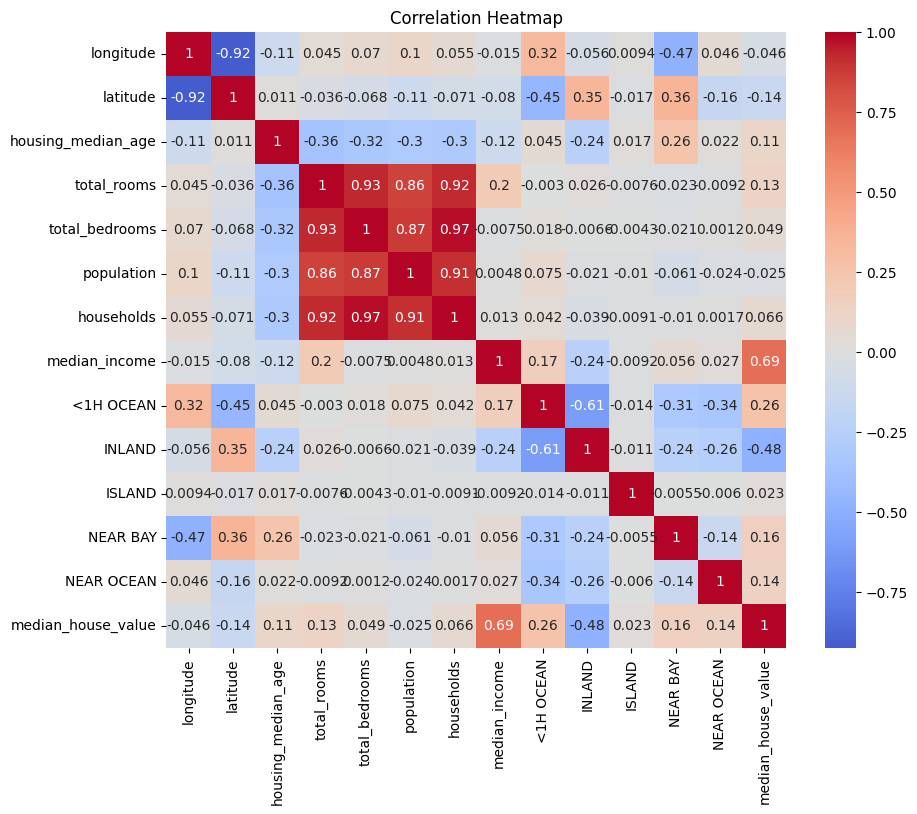

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(housing_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


#Data Scaling

In [ ]:
from sklearn import preprocessing
convert = preprocessing.StandardScaler()

In [ ]:
feature = housing.drop(['median_house_value'], axis=1)
label = housing.median_house_value

In [ ]:
featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(housing.median_house_value.values.reshape(-1,1)).flatten()

In [ ]:
print(featureT.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
featureT

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [ ]:
labelT

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

#Split the data into training and testing sets


In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)

#LinearRegression

In [ ]:
# Initialize and train the model
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
# R squared error
r2_score(linear_reg.predict(feature_train),label_train)


0.45339404634558145

Evaluation

Prediction on training data

In [ ]:
# accuracy for prediction on training data
# R squared error
score_1 = metrics.r2_score(linear_reg.predict(feature_train),label_train)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(linear_reg.predict(feature_train),label_train)

#mean_squared_error
score_3 = metrics.mean_squared_error(linear_reg.predict(feature_train),label_train)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.45339404634558145
Mean Absolute Error :  0.430590330895048
Mean squared Error :  0.352458920153226
rmse :  0.5936825078720326


#Visualizing the actual Prices and predicted prices

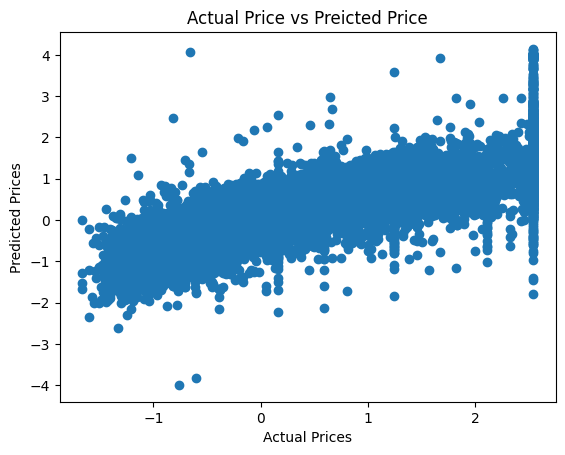

In [ ]:
plt.scatter(label_train, linear_reg.predict(feature_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(linear_reg, feature_train,label_train, cv=10)

array([0.68316888, 0.62167119, 0.6358415 , 0.64081163, 0.63010219,
       0.64034022, 0.6349214 , 0.65860852, 0.65912636, 0.65851188])

#Prediction on Test Data

In [ ]:
reg_score = r2_score(linear_reg.predict(feature_test),label_test)

In [ ]:
reg_score

0.43808074196933267

In [ ]:
# accuracy for prediction on test data
# R squared error
score_1 = metrics.r2_score(linear_reg.predict(feature_test),label_test)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(linear_reg.predict(feature_test),label_test)

#mean_squared_error
score_3 = metrics.mean_squared_error(linear_reg.predict(feature_test),label_test)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.43808074196933267
Mean Absolute Error :  0.4379832982895308
Mean squared Error :  0.36668764490708866
rmse :  0.6055473927836604


In [ ]:
linear_reg.coef_

array([-4.63837351e-01, -4.72872072e-01,  1.14482282e-01, -6.92433502e-02,
        2.33740117e-01, -4.44110705e-01,  3.15383878e-01,  6.30512815e-01,
        5.90526884e+12,  5.53389706e+12,  1.85022451e+11,  3.73398843e+12,
        3.98229728e+12])

In [ ]:
pd.DataFrame(linear_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
<1H OCEAN,5.905269e+12
INLAND,5.533897e+12
NEAR OCEAN,3.982297e+12
NEAR BAY,3.733988e+12
ISLAND,1.850225e+11
median_income,6.305128e-01
households,3.153839e-01
total_bedrooms,2.337401e-01
housing_median_age,1.144823e-01
total_rooms,-6.924335e-02


#XGBoost Regressor

In [ ]:
# loading the model
xgb_reg = XGBRegressor()
# training the model with X_train
xgb_reg.fit(feature_train,label_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

Prediction on training data

In [ ]:
r2_score(xgb_reg.predict(feature_train),label_train)

0.9287424649240669

In [ ]:
# accuracy for prediction on training data
# R squared error
score_1 = metrics.r2_score(xgb_reg.predict(feature_train),label_train)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(xgb_reg.predict(feature_train),label_train)

#mean_squared_error
score_3 = metrics.mean_squared_error(xgb_reg.predict(feature_train),label_train)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.9287424649240669
Mean Absolute Error :  0.1775336808416794
Mean squared Error :  0.06307822287432498
rmse :  0.25115378331676586


Visualizing the actual Prices and predicted prices

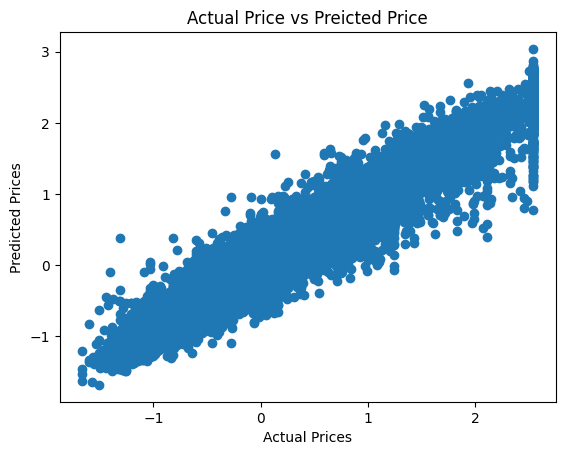

In [ ]:
plt.scatter(label_train, xgb_reg.predict(feature_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#Cross Validation Score

In [ ]:
cross_val_score(xgb_reg, feature_train, label_train, cv=10)

array([0.85169718, 0.8169793 , 0.81463383, 0.81314463, 0.83130901,
       0.82202254, 0.82520762, 0.83816912, 0.81195278, 0.83988572])

#Prediction on Test Data

In [ ]:
xgb_score = r2_score(xgb_reg.predict(feature_test),label_test)
xgb_score

0.8067128095105819

In [ ]:
# accuracy for prediction on test data
# R squared error
score_1 = metrics.r2_score(xgb_reg.predict(feature_test),label_test)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(xgb_reg.predict(feature_test),label_test)

#mean_squared_error
score_3 = metrics.mean_squared_error(xgb_reg.predict(feature_test),label_test)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.8067128095105819
Mean Absolute Error :  0.27307237821991254
Mean squared Error :  0.1619796122651691
rmse :  0.4024669082858479


#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [ ]:
forest_reg.fit(feature_train,label_train)

RandomForestRegressor()

In [ ]:
r2_score(forest_reg.predict(feature_train),label_train)

0.9714343615330251

In [ ]:
# accuracy for prediction on training data
# R squared error
score_1 = metrics.r2_score(forest_reg.predict(feature_train),label_train)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(forest_reg.predict(feature_train),label_train)

#mean_squared_error
score_3 = metrics.mean_squared_error(forest_reg.predict(feature_train),label_train)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.9714343615330251
Mean Absolute Error :  0.10192035318024986
Mean squared Error :  0.025260427250719933
rmse :  0.1589352926530792


#Visualizing the actual Prices and predicted prices

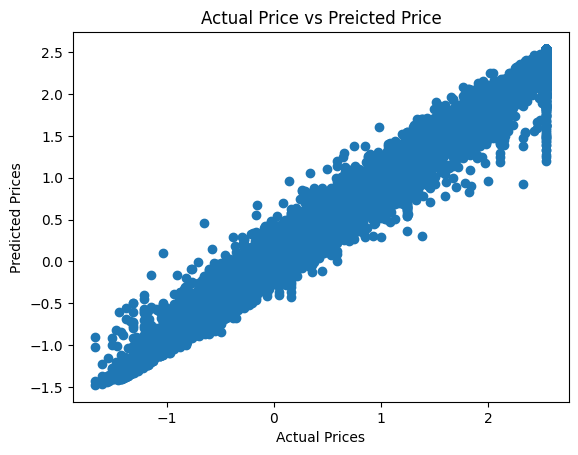

In [ ]:
plt.scatter(label_train, forest_reg.predict(feature_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#Cross Validation Score

In [ ]:
cross_val_score(forest_reg, feature_train, label_train, cv=10)

array([0.83072776, 0.81236302, 0.79881108, 0.80553381, 0.83014005,
       0.80690678, 0.82014922, 0.81717156, 0.80632463, 0.8351143 ])

#Prediction on Test Data

In [ ]:
forest_score = r2_score(forest_reg.predict(feature_test),label_test)

In [ ]:
forest_score


0.7747444101200903

In [ ]:
data = [reg_score, xgb_score,  forest_score]
index = ['Linear Regression', 'XGBoost Regressor',  'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
XGBoost Regressor,0.806713
Random Forest Regressor,0.774744
Linear Regression,0.438081
